---
title: Introduction to xarray-eopf backend.
subtitle: A userfriendly way to open Sentinel-3 EOPF Zarr products with Xarray.
authors:
  - name: Konstantin Ntokas
    orcid: 0000-0002-0049-0690
    github: konstntokas
    affiliations:
      - id: Brockmann Consult GmbH
        institution: Brockmann Consult GmbH
        ror: 04r0k9g65
reviewers:
  - name: Michele Claus
    orcid: 0000-0003-3680-381X
    github: clausmichele
    affiliations:
      - id: Eurac Research
        institution: Eurac Research
        ror: 01xt1w755
date: 2025-05-19
thumbnail: ../static/ESA_EOPF_logo_2025_COLOR_ESA_blue_reduced.png
keywords: ["data access", "xarray", "EOPF Zarr products"]
tags: ["sentinel-1", "sentinel-2", "xarray", "xarray-eopf", "stac"]
releaseDate: 2025-05-19
datePublished: 2025-05-19
dateModified: 2025-05-27
github: https://github.com/EOPF-Sample-Service/eopf-sample-notebooks
license: Apache-2.0
---

```{image} ../static/ESA_EOPF_logo_2025_COLOR_ESA_blue_reduced.png
:alt: ESA EOPF Zarr Logo
:width: 250px
:align: center
```

## Table of Contents
1. [Introduction](#Introduction_XEOPF)
2. [Install the xarray-eopf Backend](#Install_XEOPF)
3. [Import modules](#Import_XEOPF)
4. [Main Features of the xarray-eopf Backend](#Main_Features_XEOPF)
5. [Open the Product in Native Mode](#Native_XEOPF)
7. [Open the Product in Analysis Mode](#Analysis_XEOPF)
8. [Integration with the STAC Item](#STAC_XEOPF)
9. [Conclusion](#Conclusion_XEOPF)

(Introduction_XEOPF)=
## Introduction

**xarray-eopf** is a Python package that extends **xarray** with a custom backend called `"eopf-zarr"`. This backend enables **seamless access to ESA EOPF data products** stored in the **Zarr** format, presenting them as analysis-ready data structures.

This notebook demonstrates how to use the **xarray-eopf** backend to explore and analyze **Sentinel-3 EOPF Zarr datasets**. It highlights the key features currently supported by the backend.

- 🐙 **GitHub:** [EOPF Sample Service – xarray-eopf](https://github.com/EOPF-Sample-Service/xarray-eopf)  
- ❗ **Issue Tracker:** [Submit or view issues](https://github.com/EOPF-Sample-Service/xarray-eopf/issues)  
- 📘 **Documentation:** [xarray-eopf Docs](https://eopf-sample-service.github.io/xarray-eopf/)

:::{hint} Overview
**Questions**
- How do I install the xarray-eopf backend?
- How can I use the xarray-eopf backend effectively for Sentinel-3 products?
- What features does the xarray-eopf backend provide for Sentinel-3 products?

**Objectives**
- Learn how to open  Sentinel-3 EOPF Zarr products.
- Understand the key features and capabilities of the `xarray-eopf` backend provided for Sentinel-3 products.
:::

---

(Install_XEOPF)=
## Install the xarray-eopf Backend

The backend is implemented as an **xarray plugin** and can be installed using either `pip` or `conda/mamba` from the conda-forge channel.

- 📦 **PyPI:** [xarray-eopf on PyPI](https://pypi.org/project/xarray-eopf/)  `pip install xarray-eopf`
- 🐍 **Conda (conda-forge):** [xarray-eopf on Anaconda](https://anaconda.org/conda-forge/xarray-eopf) `conda install -c conda-forge xarray-eopf`

You can also use **Mamba** as a faster alternative to Conda: `mamba install -c conda-forge xarray-eopf`

> ⚠️ Please ensure you install version **0.2.0 or newer**, as this release introduces important new features for Sentinel-3 products.  


---

(Import_XEOPF)=
## Import Modules

The `xarray-eopf` backend is implemented as a plugin for `xarray`. Once installed, it registers automatically and requires no additional import. You can simply import `xarray` as usual:

In [1]:
import pystac_client
import xarray as xr

---

(Main_Features_XEOPF)=
## Main Features of the xarray-eopf Backend

The xarray-eopf backend for EOPF data products can be selecterd by setting `engine="eopf-zarr"` in `xarray.open_dataset(..)` and `xarray.open_datatree(..)` method. It supports two modes of operation:

- **Analysis Mode** *(default)*
- **Native Mode**

### Native Mode

Represents EOPF products without modification using `xarray`'s `DataTree` and `Dataset`.

- `open_dataset(..)` — Returns a *flattened* version of the data tree  
- `open_datatree(..)` — Returns the full `DataTree`, same as `xr.open_datatree(.., engine="zarr")`

### Analysis Mode

Provides an analysis-ready, resampled view of the data (currently for **Sentinel-2** and **Sentinel-3**).

- `open_dataset(..)` — Loads Sentinel-2 products in a harmonized, analysis-ready format  
- `open_datatree(..)` — Not implemented in this mode (`NotImplementedError`)
  

📚 **More info:** [xarray-eopf Guide](https://eopf-sample-service.github.io/xarray-eopf/guide/)

---

(Native_XEOPF)=
## Open the Product in Native Mode

### Sentinel-3 OLCI L1 EFR

We begin with a simple example by accessing a Sentinel-3 OLCI L1 EFR product in native mode. To obtain the product URL, you can use the [STAC Browser](https://stac.browser.user.eopf.eodc.eu/collections/sentinel-2-l2a/items/S2B_MSIL2A_20250518T112119_N0511_R037_T29RLL_20250518T140519?.language=en&.asset=asset-product) to locate a tile and retrieve the URL from the **"EOPF Product"** asset, or you can search programmatically using the STAC API to search of a respective tile, as shown below. 

In [2]:
catalog = pystac_client.Client.open("https://stac.core.eopf.eodc.eu")
items = list(
    catalog.search(
        collections=["sentinel-3-olci-l1-efr"],
        bbox=[14.8, 37.45, 15.3, 37.85],
        datetime=["2025-08-19", "2025-08-19"],
    ).items()
)
items

[<Item id=S3A_OL_1_EFR____20250819T214730_20250819T215030_20250819T231717_0179_129_257_3420_PS1_O_NR_004>,
 <Item id=S3A_OL_1_EFR____20250819T214730_20250819T215030_20250820T222832_0179_129_257_3420_PS1_O_NT_004>,
 <Item id=S3B_OL_1_EFR____20250819T210852_20250819T211152_20250819T225839_0179_110_114_3420_ESA_O_NR_004>,
 <Item id=S3B_OL_1_EFR____20250819T210852_20250819T211152_20250820T215340_0179_110_114_3420_ESA_O_NT_004>,
 <Item id=S3B_OL_1_EFR____20250819T074058_20250819T074358_20250820T082937_0179_110_106_3420_ESA_O_NT_004>,
 <Item id=S3B_OL_1_EFR____20250819T074058_20250819T074358_20250819T092155_0179_110_106_3420_ESA_O_NR_004>]

Next we can use the href and open parameters stored in the STAC item to open the data tree using `xr.open_datatree`.

In [3]:
item = items[-4]
dt = xr.open_datatree(
    item.assets["product"].href,
    **item.assets["product"].extra_fields["xarray:open_datatree_kwargs"]
)
dt

<xarray.DataTree>
Group: /
│   Attributes: (2)
├── Group: /conditions
│   ├── Group: /conditions/geometry
│   │       Dimensions:    (tp_rows: 4091, tp_columns: 77)
│   │       Coordinates:
│   │           latitude   (tp_rows, tp_columns) float64 3MB dask.array<chunksize=(4091, 77), meta=np.ndarray>
│   │           longitude  (tp_rows, tp_columns) float64 3MB dask.array<chunksize=(4091, 77), meta=np.ndarray>
│   │       Dimensions without coordinates: tp_rows, tp_columns
│   │       Data variables:
│   │           oaa        (tp_rows, tp_columns) float64 3MB dask.array<chunksize=(4091, 77), meta=np.ndarray>
│   │           oza        (tp_rows, tp_columns) float64 3MB dask.array<chunksize=(4091, 77), meta=np.ndarray>
│   │           saa        (tp_rows, tp_columns) float64 3MB dask.array<chunksize=(4091, 77), meta=np.ndarray>
│   │           sza        (tp_rows, tp_columns) float64 3MB dask.array<chunksize=(4091, 77), meta=np.ndarray>
│   ├── Group: /conditions/image
│   │       Dimensions:         (rows: 4091, columns: 4865)
│   │       Coordinates:
│   │           altitude        (rows, columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
│   │           latitude        (rows, columns) float64 159MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
│   │           longitude       (rows, columns) float64 159MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
│   │       Dimensions without coordinates: rows, columns
│   │       Data variables:
│   │           detector_index  (rows, columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
│   │           frame_offset    (rows, columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
│   ├── Group: /conditions/instrument
│   │       Dimensions:                       (bands: 21, detectors: 3700, bands1: 21,
│   │                                          bands2: 21)
│   │       Dimensions without coordinates: bands, detectors, bands1, bands2
│   │       Data variables:
│   │           fwhm                          (bands, detectors) float32 311kB dask.array<chunksize=(21, 3700), meta=np.ndarray>
│   │           lambda0                       (bands, detectors) float32 311kB dask.array<chunksize=(21, 3700), meta=np.ndarray>
│   │           relative_spectral_covariance  (bands1, bands2) float32 2kB dask.array<chunksize=(21, 21), meta=np.ndarray>
│   │           solar_flux                    (bands, detectors) float32 311kB dask.array<chunksize=(21, 3700), meta=np.ndarray>
│   ├── Group: /conditions/meteorology
│   │       Dimensions:                          (tp_rows: 4091, tp_columns: 77,
│   │                                             pressure_level: 25, wind_vector: 2)
│   │       Coordinates:
│   │         * pressure_level                   (pressure_level) float32 100B 1e+03 ... 1.0
│   │       Dimensions without coordinates: tp_rows, tp_columns, wind_vector
│   │       Data variables:
│   │           atmospheric_temperature_profile  (tp_rows, tp_columns, pressure_level) float32 32MB dask.array<chunksize=(2046, 26, 9), meta=np.ndarray>
│   │           horizontal_wind                  (tp_rows, tp_columns, wind_vector) float32 3MB dask.array<chunksize=(4091, 77, 1), meta=np.ndarray>
│   │           humidity                         (tp_rows, tp_columns) float32 1MB dask.array<chunksize=(4091, 77), meta=np.ndarray>
│   │           sea_level_pressure               (tp_rows, tp_columns) float32 1MB dask.array<chunksize=(4091, 77), meta=np.ndarray>
│   │           total_columnar_water_vapour      (tp_rows, tp_columns) float32 1MB dask.array<chunksize=(4091, 77), meta=np.ndarray>
│   │           total_ozone                      (tp_rows, tp_columns) float32 1MB dask.array<chunksize=(4091, 77), meta=np.ndarray>
│   └── Group: /conditions/orphans
│           Dimensions:            (rows: 4091, removed_pixels: 150)
│           Coordinates:
│               altitude           (rows, removed_pixels) float32 2MB dask.array<chunksize

We can access the spectral data by navigating through the data tree and visualize the data with the usual xarray plotting routines. 

In [4]:
ds = dt.measurements.to_dataset()
ds

<xarray.Dataset> Size: 2GB
Dimensions:        (rows: 4091, columns: 4865)
Coordinates:
    latitude       (rows, columns) float64 159MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    longitude      (rows, columns) float64 159MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    time_stamp     (rows) datetime64[ns] 33kB dask.array<chunksize=(1024,), meta=np.ndarray>
Dimensions without coordinates: rows, columns
Data variables: (12/21)
    oa01_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    oa02_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    oa03_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    oa04_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    oa05_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    oa06_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    ...             ...
    oa16_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    oa17_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    oa18_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    oa19_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    oa20_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    oa21_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>

> ⚠️ Note: The dataset is loaded **lazily**.  
> Actual data access/download is triggered when the data is **written to disk** or **visualized**.

CPU times: user 6.41 s, sys: 2.2 s, total: 8.61 s
Wall time: 33.1 s


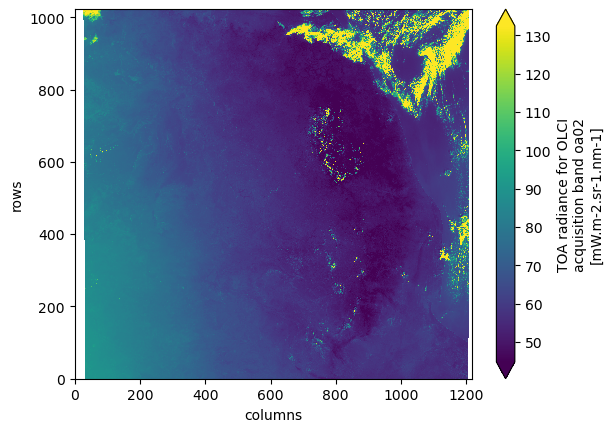

In [5]:
%%time
ds.oa02_radiance[::4, ::4].plot(robust=True)

We can also open the product with `xr.open_dataset`, which returns a flattened DataTree represented as an `xr.Dataset`.

In [6]:
ds = xr.open_dataset(
    item.assets["product"].href,
    **item.assets["product"].extra_fields["xarray:open_datatree_kwargs"]
)
ds

<xarray.Dataset> Size: 5GB
Dimensions:                                                 (
                                                             conditions_geometry_tp_rows: 4091,
                                                             conditions_geometry_tp_columns: 77,
                                                             conditions_image_rows: 4091,
                                                             conditions_image_columns: 4865,
                                                             conditions_instrument_bands: 21,
                                                             ...
                                                             conditions_orphans_rows: 4091,
                                                             conditions_orphans_removed_pixels: 150,
                                                             measurements_rows: 4091,
                                                             measurements_columns: 4865,
                                                             quality_rows: 4091,
                                                             quality_columns: 4865)
Coordinates: (12/14)
    conditions_geometry_latitude                            (conditions_geometry_tp_rows, conditions_geometry_tp_columns) float64 3MB dask.array<chunksize=(4091, 77), meta=np.ndarray>
    conditions_geometry_longitude                           (conditions_geometry_tp_rows, conditions_geometry_tp_columns) float64 3MB dask.array<chunksize=(4091, 77), meta=np.ndarray>
    conditions_image_altitude                               (conditions_image_rows, conditions_image_columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    conditions_image_latitude                               (conditions_image_rows, conditions_image_columns) float64 159MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    conditions_image_longitude                              (conditions_image_rows, conditions_image_columns) float64 159MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
  * conditions_meteorology_pressure_level                   (conditions_meteorology_pressure_level) float32 100B ...
    ...                                                      ...
    conditions_orphans_longitude                            (conditions_orphans_rows, conditions_orphans_removed_pixels) float64 5MB dask.array<chunksize=(1024, 150), meta=np.ndarray>
    measurements_latitude                                   (measurements_rows, measurements_columns) float64 159MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    measurements_longitude                                  (measurements_rows, measurements_columns) float64 159MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    measurements_time_stamp                                 (measurements_rows) datetime64[ns] 33kB dask.array<chunksize=(1024,), meta=np.ndarray>
    quality_latitude                                        (quality_rows, quality_columns) float64 159MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    quality_longitude                                       (quality_rows, quality_columns) float64 159MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
Dimensions without coordinates: conditions_geometry_tp_rows,
                                conditions_geometry_tp_columns,
                                conditions_image_rows,
                                conditions_image_columns,
                                conditions_instrument_bands,
                                conditions_instrument_detectors,
                                ...
                                conditions_meteorology_tp_columns,
                                conditions_meteorology_wind_vector,
                                conditions_orphans_rows,
                                conditions_orphans_removed_pixels,
                                measurements_rows, measurements_columns,
                              

We can filter the returned variables using the `variables` keyword argument, which accepts a string, an iterable of names, or a regular expression (regex) pattern.

In [7]:
ds = xr.open_dataset(
    item.assets["product"].href,
    **item.assets["product"].extra_fields["xarray:open_datatree_kwargs"],
    variables="measurements*",
)
ds

<xarray.Dataset> Size: 2GB
Dimensions:                     (measurements_rows: 4091,
                                 measurements_columns: 4865)
Coordinates:
    measurements_latitude       (measurements_rows, measurements_columns) float64 159MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    measurements_longitude      (measurements_rows, measurements_columns) float64 159MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    measurements_time_stamp     (measurements_rows) datetime64[ns] 33kB dask.array<chunksize=(1024,), meta=np.ndarray>
Dimensions without coordinates: measurements_rows, measurements_columns
Data variables: (12/21)
    measurements_oa01_radiance  (measurements_rows, measurements_columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    measurements_oa02_radiance  (measurements_rows, measurements_columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    measurements_oa03_radiance  (measurements_rows, measurements_columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    measurements_oa04_radiance  (measurements_rows, measurements_columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    measurements_oa05_radiance  (measurements_rows, measurements_columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    measurements_oa06_radiance  (measurements_rows, measurements_columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    ...                          ...
    measurements_oa16_radiance  (measurements_rows, measurements_columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    measurements_oa17_radiance  (measurements_rows, measurements_columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    measurements_oa18_radiance  (measurements_rows, measurements_columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    measurements_oa19_radiance  (measurements_rows, measurements_columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    measurements_oa20_radiance  (measurements_rows, measurements_columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    measurements_oa21_radiance  (measurements_rows, measurements_columns) float32 80MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
Attributes: (2)

Following the previous steps, we can now select a data variable and display a spectral band as an example.

CPU times: user 5.76 s, sys: 2.12 s, total: 7.88 s
Wall time: 31.2 s


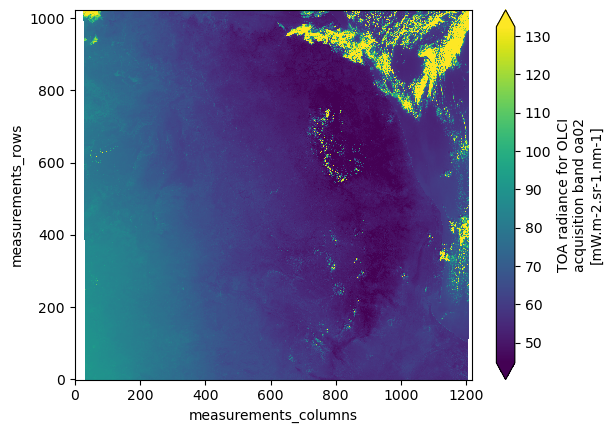

In [8]:
%%time
ds.measurements_oa02_radiance[::4, ::4].plot(robust=True)

---

(Analysis_XEOPF)=
## Open the Product in Analysis Mode

Analysis mode is currently available for **Sentinel-2** and **Sentinel-3** products. Support for **Sentinel-1** will be added in future releases.

Sentinel-3 products are provided on their **native grid mapping**, where each pixel is defined by a latitude/longitude pair, forming a **2D irregular grid**.  

The analysis mode applies the [rectification algorithm in xcube-resampling](https://xcube-dev.github.io/xcube-resampling/guide/#3-rectification) to transform the irregular dataset into a **regular grid** with 1D latitude/longitude coordinates.  

**Suported Products:**

- [Sentinel-3 OLCI Level-1 EFR](https://stac.browser.user.eopf.eodc.eu/collections/sentinel-3-olci-l1-efr)
- [Sentinel-3 OLCI Level-1 ERR](https://stac.browser.user.eopf.eodc.eu/collections/sentinel-3-olci-l1-err)
- [Sentinel-3 OLCI Level-2 LFR](https://stac.browser.user.eopf.eodc.eu/collections/sentinel-3-olci-l2-lfr)
- [Sentinel-3 SLSTR Level-2 LST](https://stac.browser.user.eopf.eodc.eu/collections/sentinel-3-slstr-l2-lst)


### Analysis mode for Sentinel-3

The analysis mode for Sentinel-3 has the following key properties:

- **Default mode** when using the `"eopf-zarr"` backend.
- **Spatial resolution options:** Users can choose freely a resolution in degree via the parameter `resolution`. If not given, the avaragend resolution of the 2d irregular grid is taken.
- **Upsampling / interpolation:**  
  - Performed via 2D interpolation controlled by the `interp_methods` argument.  
  - Accepts a single interpolation method for all variables or a dictionary mapping variable names or dtypes to interpolation method.
  - Supported methods include:
    - `0` (nearest neighbor)
    - `1` (linear / bilinear)
    - `"nearest"` (default for categorical data)
    - `"triangular"`
    - `"bilinear"` (default)
- **Downsampling / Aggregation:**  
  - Done through aggregation methods governed by the `agg_methods` argument.  
  - Can be a single method for all variables or a dictionary mapping variable names or dtypes to interpolation method. 
  - Supported methods include:
      - `"center"` (default for categorical data)
      - `"count"`
      - `"first"`
      - `"last"`
      - `"max"`
      - `"mean"` (default)
      - `"median"`
      - `"mode"`
      - `"min"`
      - `"prod"`
      - `"std"`
      - `"sum"`
      - `"var"` 
- **Variable selection:** Specific variables can be selected via the `variables` argument, which accepts a variable name, a regex pattern, or an iterable of either.

More details are available in the [documentation](https://eopf-sample-service.github.io/xarray-eopf/api/#xarray_eopf.backend.EopfBackend.open_dataset).


In [9]:
%%time
ds = xr.open_dataset(
    item.assets["product"].href,
    engine="eopf-zarr",
    chunks={},
    interp_methods="nearest"
)
ds

CPU times: user 33.9 s, sys: 10.2 s, total: 44.1 s
Wall time: 2min 31s


<xarray.Dataset> Size: 43MB
Dimensions:        (rows: 4091, lon: 3568, lat: 2995)
Coordinates:
    time_stamp     (rows) datetime64[ns] 33kB dask.array<chunksize=(1024,), meta=np.ndarray>
    spatial_ref    int64 8B ...
  * lon            (lon) float64 29kB 18.45 18.46 18.46 18.47 ... 34.5 34.5 34.5
  * lat            (lat) float64 24kB -21.06 -21.06 -21.06 ... -34.52 -34.53
Dimensions without coordinates: rows
Data variables:
    oa02_radiance  (lat, lon) float32 43MB dask.array<chunksize=(2995, 3568), meta=np.ndarray>
Attributes: (10)

CPU times: user 26.9 s, sys: 8.07 s, total: 35 s
Wall time: 1min 33s


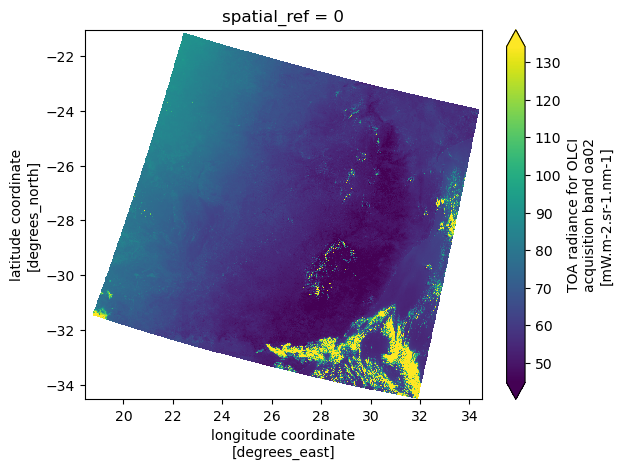

In [10]:
%%time
ds.oa02_radiance[::4, ::4].plot(robust=True)

(Conclusion_XEOPF)=
## Conclusion

This notebook showcases the new functionalities of the **xarray-eopf** backend for accessing Sentinel-3 EOPF Zarr products.  
It enables seamless access using familiar Xarray methods such as `xr.open_dataset` and `xr.open_datatree` by specifying `engine="eopf-zarr"`.

The key takeaways are summarized below:

### Operation Modes

- **`op_mode="native"`**  
  Represents EOPF products without modification using Xarray's `DataTree` and `Dataset` structures.  
  For example, opening a dataset with `xr.open_dataset(path, engine="eopf-zarr", op_mode="native")` returns the data tree as a *flattened* `xr.Dataset`.

- **`op_mode="analysis"`**  
  Provides an analysis-ready, resampled view of Sentinel-3 data.  
  It applies the [rectification algorithm in xcube-resampling](https://xcube-dev.github.io/xcube-resampling/guide/#3-rectification) to transform the irregular dataset into a **regular grid** with 1D latitude and longitude coordinates.

---

### Future Development Steps

- Extend analysis mode support to the remaining Sentinel-3 products once data becomes available.  
- Add analysis mode support for Sentinel-1 products.

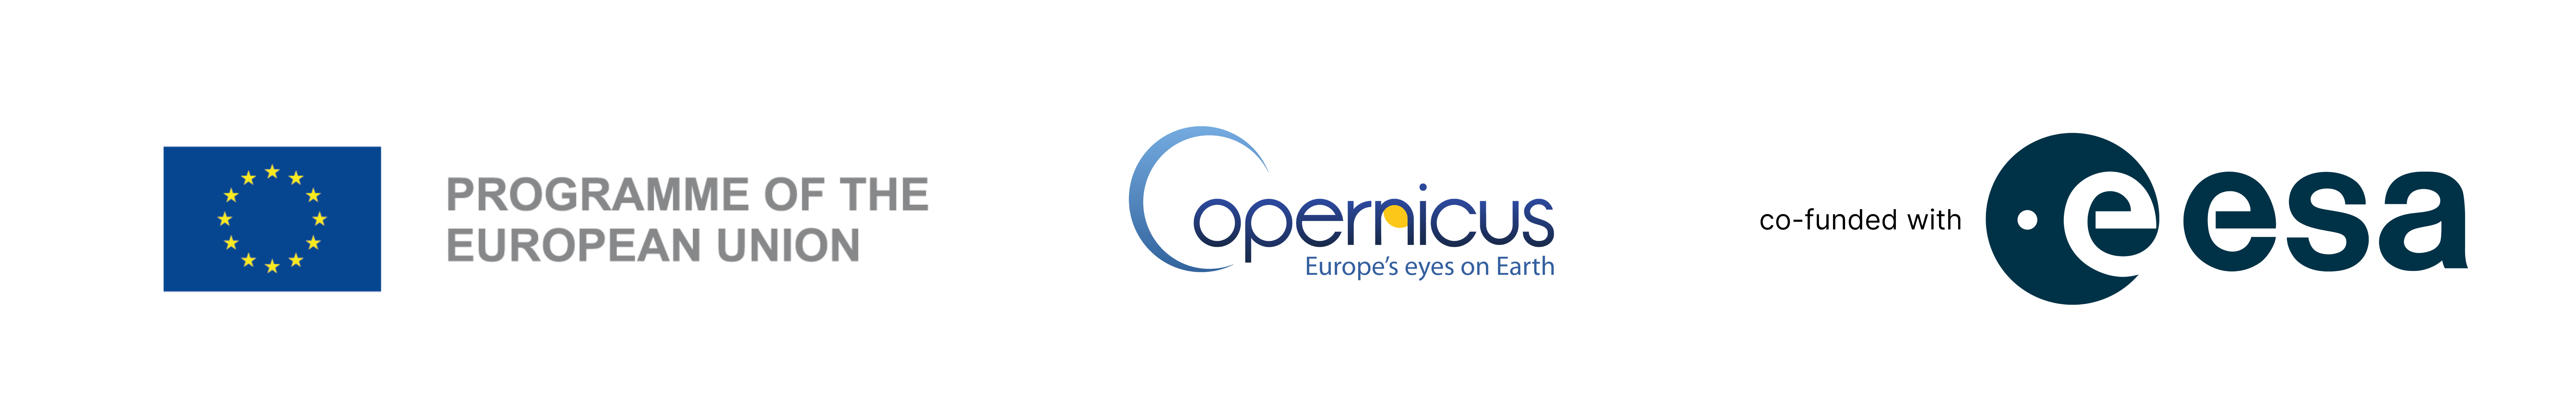